Shape of X [N, C, H, W]:
 torch.Size([64, 1, 28, 28])
Shape of y:
 torch.Size([64]) 
 torch.int64


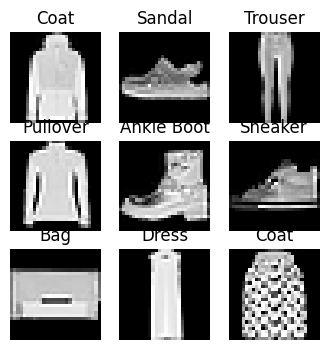

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor 

device = 'cuda' 
#if torch.cuda.is_available()
#print('CUDA:', torch.cuda.is_available(), '     Use << {} >>'.format(device.upper()))
#print('PyTorch Version:', torch.__version__)   

train_data = datasets.FashionMNIST(    
    root='data', train=True, download=True, transform=ToTensor()
)
test_data = datasets.FashionMNIST(    
    root='data', train=False, download=True, transform=ToTensor()
)

batch_size = 64
trainloader = DataLoader(    
    train_data, batch_size=batch_size
)
testloader = DataLoader(    
    test_data, batch_size=batch_size
)

for X, y in testloader:    
    print('Shape of X [N, C, H, W]:\n', X.shape)    
    print('Shape of y:\n', y.shape, '\n', y.dtype)    
    break     
labels_map = {    
    0: "T-Shirt",    
    1: "Trouser",    
    2: "Pullover",    
    3: "Dress",    
    4: "Coat",    
    5: "Sandal",    
    6: "Shirt",    
    7: "Sneaker",    
    8: "Bag",    
    9: "Ankle Boot",
} 

fig = plt.figure(figsize=(4, 4))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):    
    sample_idx = torch.randint(len(train_data), size=(1,)).item()    
    img, label = train_data[sample_idx]    
    fig.add_subplot(rows, cols, i)    
    plt.title(labels_map[label])    
    plt.axis("off")    
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()   
    
class Net(nn.Module):    
    def __init__(self):        
        super().__init__()        
        self.flatten = nn.Flatten()        
        self.layer = nn.Sequential(            
            nn.Linear(28*28, 512),            
            nn.ReLU(),            
            nn.Linear(512, 512),            
            nn.ReLU(),            
            nn.Linear(512, 10),            
            nn.ReLU()        
            )    

    def forward(self, x):        
        x = self.flatten(x)        
        Net_Out = self.layer(x)        
        return Net_Out

def train(dataloader, model, loss_fn, optimizer):    
    pbar = tqdm(dataloader, desc=f'Training')    
    for batch, (X, y) in enumerate(pbar):        
        # X, y = X.to(device), y.to(device)         
        
        # Feedforward        
        pred = model(X)         

        # Calc. Loss        
        loss = loss_fn(pred, y)         
        
        # Backpropagation        
        optimizer.zero_grad()        
        loss.backward()        
        optimizer.step() 
        
def test(dataloader, model, loss_fn):    
    size = len(dataloader.dataset)    
    num_batches = len(dataloader)    
    #model.eval()    
    loss, correct = 0,0    
    with torch.no_grad():        
        for X, y in dataloader:            
            # X, y = X.to(device), y.to(device)            
            pred = model(X)            
            loss += loss_fn(pred, y).item()            
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()    
    loss /= num_batches    
    correct /= size    
    print(f'Test Accuracy: {(100*correct):>0.1f}%     Loss: {loss:>8f} \n')
            
    return 100*correct, loss   
# Generate the Model
model = Net().to(device) 
    
# Set the Training Parameters
lr = 1e-3
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr) 
# Plot
fig = plt.figure(figsize=(20,5))
line1, line2 = plt.plot([],[],[],[])
plt.clf() 

# Train the Network
epochs = 100
for t in range(epochs):    
    print(f'----- Epoch {t+1} -----')    
    train(trainloader, model, loss_fn, optimizer)    
    accuracy, loss = test(testloader, model, loss_fn)     
    # Add Accuracy & Loss to the Lines    
    line1.set_xdata(np.append(line1.get_xdata(), t+1))    
    line1.set_ydata(np.append(line1.get_ydata(), loss))    
    line2.set_ydata(np.append(line2.get_ydata(), accuracy)
    ) 
fig.add_subplot(1,2,1)
plt.plot(line1.get_xdata(), line1.get_ydata(), color='red')
plt.plot(line1.get_xdata(), line1.get_ydata(), 'o', color='red')
plt.xlabel('Epoch', fontsize=12); 
plt.ylabel('Loss', fontsize=12)
fig.add_subplot(1,2,2)
plt.plot(line1.get_xdata(), line2.get_ydata(), color='blue')
plt.plot(line1.get_xdata(), line2.get_ydata(), 'o', color='blue')
plt.xlabel('Epoch', fontsize=12); 
plt.ylabel('Accuracy', fontsize=12) 
plt.tight_layout()
plt.autoscale()
plt.show()